In [111]:
import numpy as np
import matplotlib.pyplot as plt
import time 

In [112]:
def distance(point_a, point_b) :
    return np.linalg.norm(point_a - point_b)

In [113]:
def generate_circle_point(centerpoint,radius) :
    angle = np.random.uniform(0,2*np.pi)
    rad = np.sqrt(np.random.uniform(0,radius**2))
    
    return centerpoint[0] + rad*np.cos(angle),centerpoint[1] + rad*np.sin(angle)

In [114]:
def generate_points(no_points, centerpoint, no_groups, radius = 1):
    
    points = []
    groups = []
    group_radius = radius
    
    c_x,c_y = centerpoint
    
    if no_groups == 1 :
        groups.append((c_x,c_y))
    else :
        val = (1/no_groups)
        if no_groups == 2 : val = 0.4
        for i in range(no_groups) :
            groups.append([(c_x + radius*np.cos(i*((2*np.pi)/no_groups))),(c_y + radius*np.sin(i*((2*np.pi)/no_groups)))])
        groups = np.array(groups)
        group_radius = distance(groups[0],groups[1])*(val)
    points_per_group = no_points // no_groups
    points_left = no_points % no_groups

    for x,y in groups :
        for _ in range(points_per_group) :
            points.append(generate_circle_point((x,y),group_radius))
    
    for _ in range(points_left) :
        x,y = groups[np.random.choice(no_groups)]
        points.append(generate_circle_point((x,y),group_radius))

      
    return points
no_points = 60
centerpoint = (0,0)
no_groups = 9

points = generate_points(no_points, centerpoint, no_groups, radius = 10)

points = np.array(points)

<Figure size 640x480 with 0 Axes>

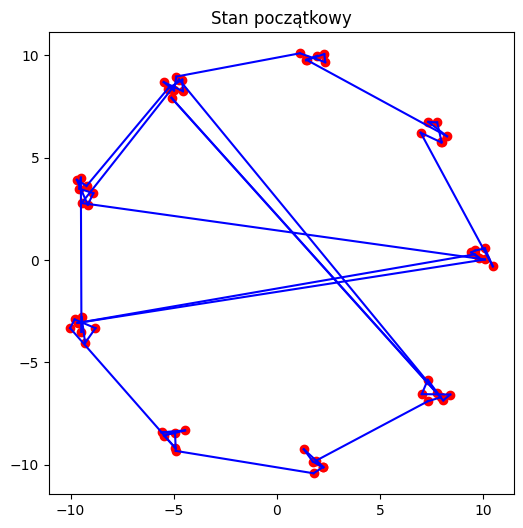

In [115]:
path = [_ for _ in range(len(points))]

plt.clf()

x = points[:, 0]
y = points[:, 1]

plt.figure(figsize=(6, 6))
plt.scatter(x, y, color='red')

for i in range(len(points)) :
    plt.plot([x[path[i]],x[path[i - 1]]],[y[path[i]],y[path[i - 1]]], color = 'blue')

plt.title('Stan początkowy')
plt.show()

In [116]:
def simulated_annealing(points, iterations = 3000, T = 5000, cooling_rate = 0.995) :
    
    n = len(points)
    path = [_ for _ in range(n)]
    
    E = 0
    for i in range(n) :
        E += distance(points[path[i]],points[path[i-1]])
    E_tab = [E]
    temp_tab = [T]
    
    start = time.time()
    
    for _ in range(iterations) :
        if _ % (iterations // 10) == 0 : print(_ // (iterations // 100),'%, E =',E, 'Time:',round(time.time()-start,2))
        
        
        vals = [np.random.choice(n),np.random.choice(n)]
        while vals[1] == vals[0] :
            vals[1] = np.random.choice(n)
        
        neighbours = False
        vals.sort()
        if vals[0] == 0 and vals[-1] == n-1 : 
            vals.reverse()
            neighbours = True
        a_ind, b_ind = vals
        
        if abs(a_ind - b_ind) == 1 : neighbours = True
        
        d_E = 0
        
        d_E -= distance(points[path[a_ind]],points[path[(a_ind - 1) % n]])
        d_E -= distance(points[path[b_ind]],points[path[(b_ind + 1) % n]])
        
        if not neighbours :
            d_E -= distance(points[path[a_ind]],points[path[(a_ind + 1) % n]])
            d_E -= distance(points[path[b_ind]],points[path[(b_ind - 1) % n]])
            
            d_E += distance(points[path[b_ind]],points[path[(a_ind + 1) % n]])
            d_E += distance(points[path[a_ind]],points[path[(b_ind - 1) % n]])
        
        
        d_E += distance(points[path[b_ind]],points[path[(a_ind - 1) % n]])
        d_E += distance(points[path[a_ind]],points[path[(b_ind + 1) % n]])

        
        if (d_E < 0) or (np.exp(-d_E/T) > np.random.uniform(0,1)) :
            path[a_ind],path[b_ind] = path[b_ind],path[a_ind]
            
            E += d_E
        T *= cooling_rate
        E_tab.append(E)
        temp_tab.append(T)
    print(100,'%, E =',E, ' Time:',round(time.time()-start,2))
        
    return E_tab, temp_tab, path

In [117]:
# plot_points_e, plot_points_t, path = simulated_annealing(points, 10_000_000, 1_000_000, 0.9999982)
plot_points_e, plot_points_t, path = simulated_annealing(points, 200_000, 10, 0.99997)

0 %, E = 215.74821951215165 Time: 0.0
10 %, E = 355.29618867914115 Time: 1.47
20 %, E = 233.89958956191074 Time: 2.99
30 %, E = 135.99370491246404 Time: 4.45
40 %, E = 94.63877285207792 Time: 5.95
50 %, E = 88.23877807592008 Time: 7.4
60 %, E = 79.40391651390229 Time: 8.89
70 %, E = 78.25463698424701 Time: 10.38
80 %, E = 75.12617102127847 Time: 11.84
90 %, E = 75.17273409333494 Time: 13.27
100 %, E = 75.19283601288308  Time: 14.78


In [118]:
def plot_graph(plot_points,title = '', y_label = '', x_label = '') :
    plt.plot([_ for _ in range(len(plot_points))], plot_points)

    col = 'red'
    if plot_points[-1] < plot_points[0] :
        col = 'green'

    plt.axhline(y=plot_points[0], color=col, linestyle='--')

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    print(f"0: {plot_points[0]}, {len(plot_points) - 1}: {plot_points[-1]}")

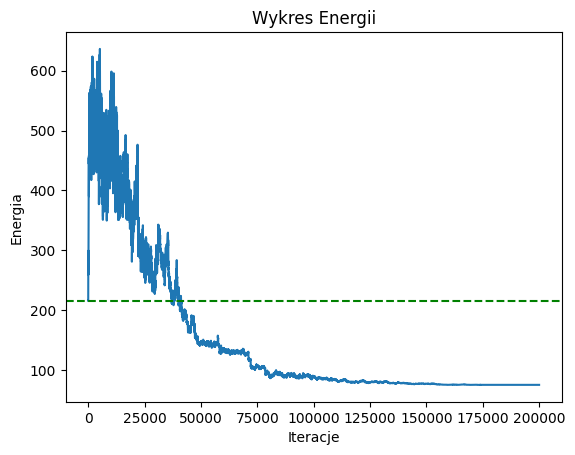

0: 215.74821951215165, 200000: 75.19283601288308


In [119]:
plot_graph(plot_points_e,'Wykres Energii','Energia','Iteracje')

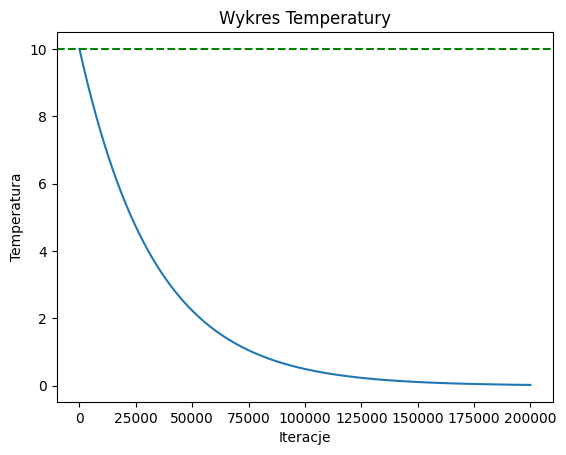

0: 10, 200000: 0.02478529094560254


In [120]:
plot_graph(plot_points_t,'Wykres Temperatury','Temperatura','Iteracje')

<Figure size 640x480 with 0 Axes>

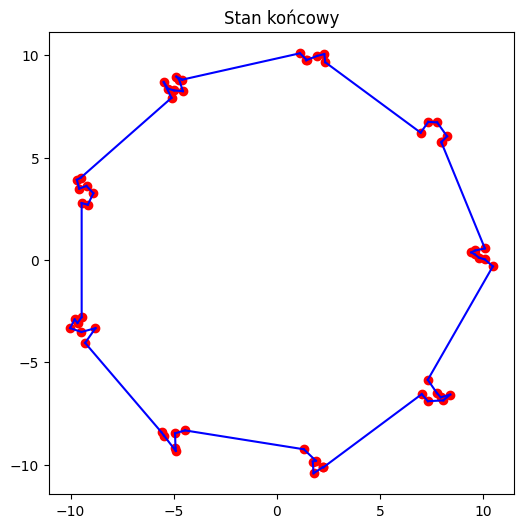

In [121]:
plt.clf()

x = points[:, 0]
y = points[:, 1]

plt.figure(figsize=(6, 6))
plt.scatter(x, y, color='red')

for i in range(len(points)) :
    plt.plot([x[path[i]],x[path[i - 1]]],[y[path[i]],y[path[i - 1]]], color = 'blue')

plt.title('Stan końcowy')

plt.show()
